In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from drawdata import ScatterWidget
from qbstyles import mpl_style

import torch
from torch import nn, optim
from torch.utils.data import TensorDataset

mpl_style()

In [3]:
widget = ScatterWidget()
widget

ScatterWidget()

In [4]:
data = widget.data_as_pandas

df = data[['x', 'y']]

In [5]:
df.head()

,x,y
0,215.329918,418.649711
1,241.217389,435.714061
2,225.972038,418.030991
3,231.799418,435.798007
4,224.490207,432.812771


<Axes: xlabel='x', ylabel='y'>

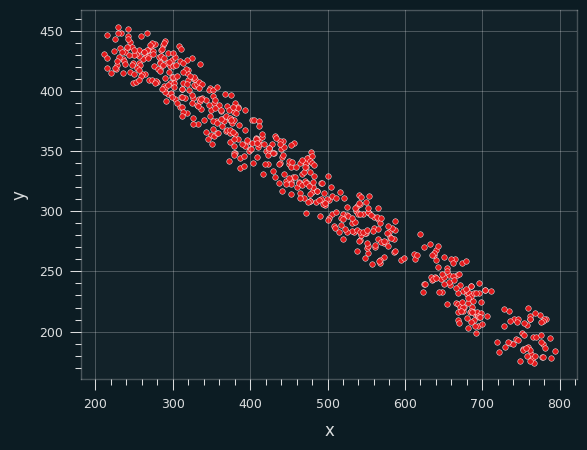

In [6]:
sns.scatterplot(df, x='x', y='y')

In [203]:
X = df[['x']].values
Y = df[['y']].values
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32)

dataset = TensorDataset(X, Y)

In [204]:
class AbsoluteRegression(nn.Module):
    def __init__(self):
        super(AbsoluteRegression, self).__init__()
        self.w = nn.Parameter(torch.randn(1))
        self.b = nn.Parameter(torch.randn(1))
    
    def forward(self, x):
        return self.w * torch.abs(x) + self.b
    
    def predict(self, x):
        self.eval()
        with torch.no_grad():
            return self.forward(x)

In [205]:
model = AbsoluteRegression()

In [217]:
losses = []
criterion = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)
epochs = 10

for epoch in range(1, epochs + 1):
    avg_loss = 0
    for x, y in dataset:
        model.train()
        optimizer.zero_grad()
        yhat = model.forward(x)
        assert not np.isnan(yhat.item()), f"{epoch = }, {x = }, {y = }"
        loss = criterion(yhat, y)
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
        avg_loss += loss.item()
        # print(f"{loss.item() = }")
    
    avg_loss /= len(dataset)    
    print(f"{epoch}/{epochs}: Loss: {avg_loss:,.4f}")

1/10: Loss: 39.4405
2/10: Loss: 37.6367
3/10: Loss: 37.9082
4/10: Loss: 38.0869
5/10: Loss: 36.9722
6/10: Loss: 38.0866
7/10: Loss: 36.9721
8/10: Loss: 38.8957
9/10: Loss: 37.5941
10/10: Loss: 37.6358


<Axes: >

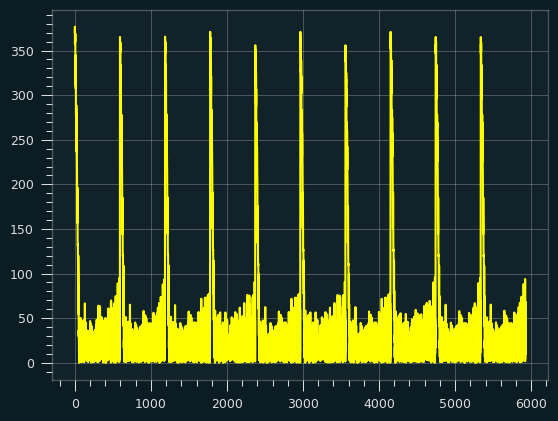

In [218]:
sns.lineplot(losses, color='yellow')

<Axes: xlabel='x', ylabel='y'>

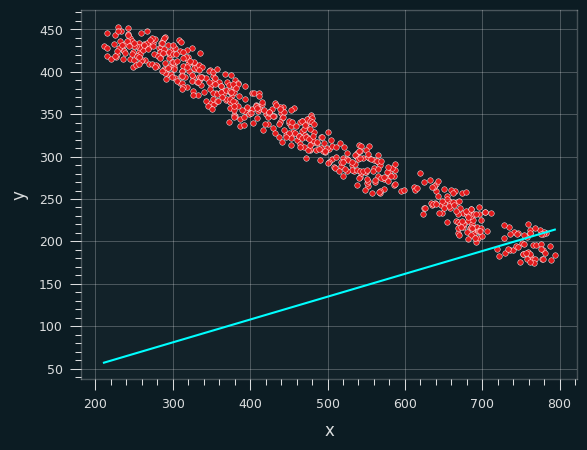

In [220]:
w = model.w.item()
b = model.b.item()

line = w * df['x'].abs() + b

sns.scatterplot(df, x='x', y='y')
sns.lineplot(x=df['x'], y=line, color='cyan')

In [224]:
w

0.26919788122177124

In [223]:
y_pred = model.predict(X)
nn.L1Loss()(y_pred, Y) / X.shape[0]

tensor(0.3380)